In [1]:
!git clone https://github.com/michaelo-ponteski/isaid-instance-segmentation.git
%cd isaid-instance-segmentation/

Cloning into 'isaid-instance-segmentation'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 41 (delta 12), reused 34 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (41/41), 14.17 KiB | 2.83 MiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/isaid-instance-segmentation


In [2]:
!pwd

/content/isaid-instance-segmentation


In [3]:
# The following code will only execute
# successfully when compression is complete

import kagglehub

# Download latest version
path = kagglehub.dataset_download("michaeloponteski/isaid-patches")

print("Path to dataset files:", path)

100%|██████████| 41.1G/41.1G [31:28<00:00, 23.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/michaeloponteski/isaid-patches/versions/1


In [4]:
import torch
import torchvision
import matplotlib.pyplot as plt

In [5]:
from datasets.isaid_dataset import iSAIDDataset, visualize_sample
from models.maskrcnn_model import get_maskrcnn_model, MaskRCNNTrainer
from utils.overfit_test import overfit_single_image_test

In [6]:
root_dir = '/root/.cache/kagglehub/datasets/michaeloponteski/isaid-patches/versions/1/iSAID_patches'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_classes = 16

# Load dataset
train_dataset = iSAIDDataset(root_dir, split='train')
val_dataset = iSAIDDataset(root_dir, split='val')

print(f"Train: {len(train_dataset)}, Val: {len(val_dataset)}")

Train: 28029, Val: 9512


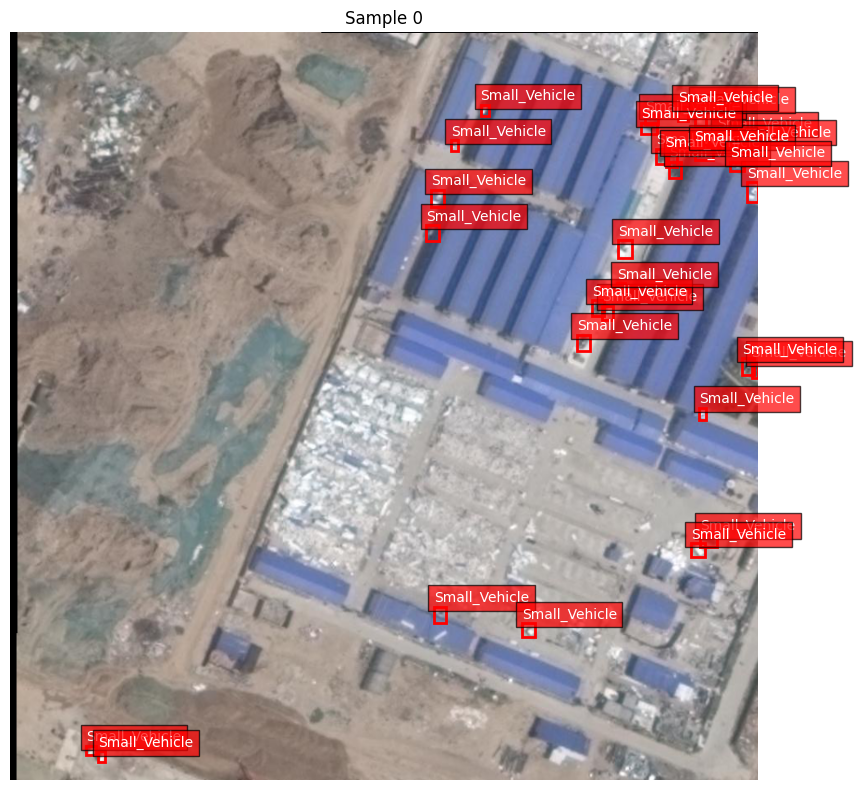

In [7]:
visualize_sample(train_dataset, 0)

In [31]:
model = get_maskrcnn_model(num_classes, pretrained=True)

OVERFIT SINGLE IMAGE TEST

Image shape: torch.Size([3, 800, 800])
Number of instances: 30
Classes: [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]

Training for 300 epochs...
Epoch [10/300], Loss: 1.8773
  loss_classifier: 0.2502
  loss_box_reg: 0.7635
  loss_mask: 0.4737
  loss_objectness: 0.1733
  loss_rpn_box_reg: 0.2165
Epoch [20/300], Loss: 1.6931
  loss_classifier: 0.2983
  loss_box_reg: 0.6802
  loss_mask: 0.3694
  loss_objectness: 0.1618
  loss_rpn_box_reg: 0.1834
Epoch [30/300], Loss: 1.1388
  loss_classifier: 0.1887
  loss_box_reg: 0.4590
  loss_mask: 0.3086
  loss_objectness: 0.0458
  loss_rpn_box_reg: 0.1367
Epoch [40/300], Loss: 0.8088
  loss_classifier: 0.1097
  loss_box_reg: 0.3284
  loss_mask: 0.2387
  loss_objectness: 0.0455
  loss_rpn_box_reg: 0.0867
Epoch [50/300], Loss: 0.7255
  loss_classifier: 0.0912
  loss_box_reg: 0.2597
  loss_mask: 0.2089
  loss_objectness: 0.0545
  loss_rpn_box_reg: 0.1112
Epoch [60/300], Loss: 0.564

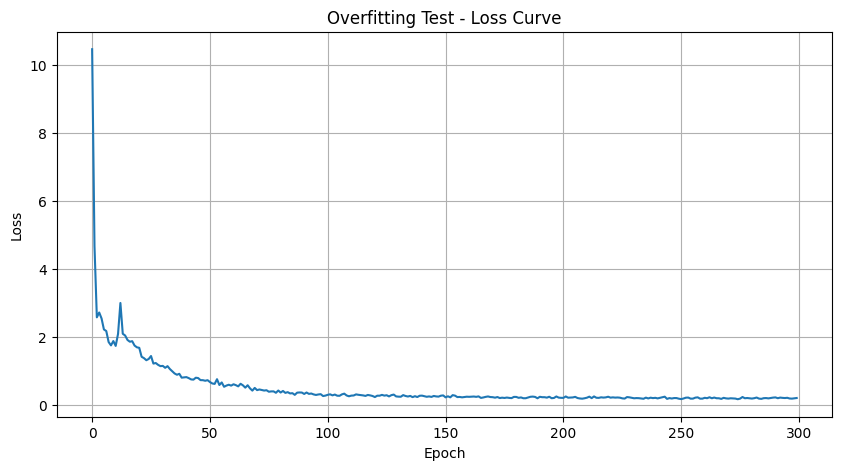

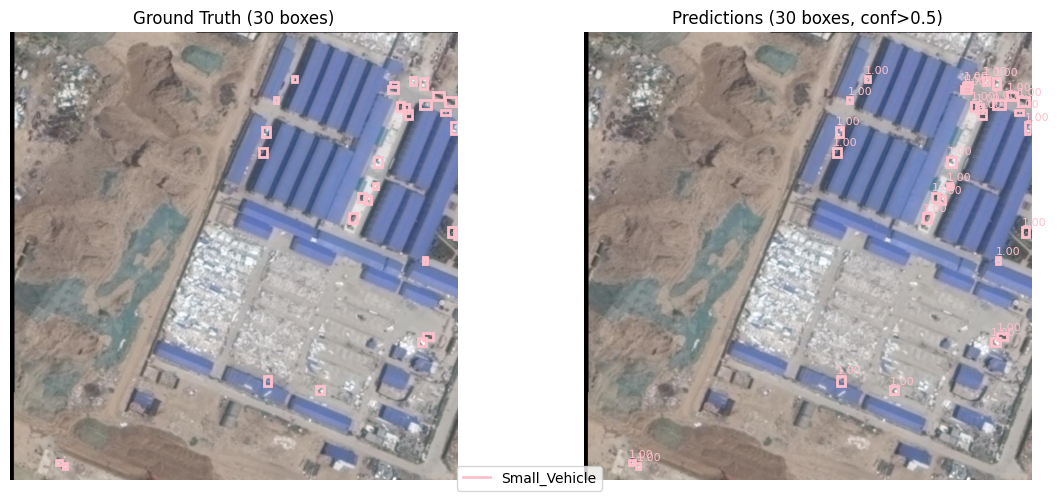


Found 30 boxes (should be 30)

RESULTS:
Initial Loss: 10.4684
Final Loss: 0.2006
Improvement: 98.1%


In [32]:
losses, preds = overfit_single_image_test(
    model,
    train_dataset,
    idx=0,
    num_epochs=300,
    device=device
)

In [29]:
!git pull

remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 14 (delta 6), reused 10 (delta 5), pack-reused 0 (from 0)
Unpacking objects: 100% (14/14), 1.48 MiB | 12.50 MiB/s, done.
From https://github.com/michaelo-ponteski/isaid-instance-segmentation
   a2e89a5..c61d932  main       -> origin/main
Updating a2e89a5..c61d932
Fast-forward
 notebooks/00_setup.ipynb | 566 ++++++++++++++++++++++++++++++++++++++++-------
 utils/overfit_test.py    | 101 +++++----
 2 files changed, 546 insertions(+), 121 deletions(-)


In [30]:
import importlib
import utils.overfit_test

importlib.reload(utils.overfit_test)
from utils.overfit_test import overfit_single_image_test